## Liam Preis Project Propsal

### Issue of Interest: Baltimore City
Baltimore city is my issus of interest. Specifically I have questions surrounding vacant houses. It is an issue that everyone notices. You cannot drive around in the city and notice all of the houses in disrepair. A Washington Post headline from October 2019 reads *Baltimore is furiously knocking down vacant houses — but barely keeps up as new ones go empty*, the article by Ian Duncan details Baltimore's strugle and the barriers to getting ahead.
One thing Ian Points out is that Housing Commissioner Michaerl Braverman said that by 2020 the total count of vacant houses would tally below 15,000 for the first time in 15 years. They were not able to reach that goal because more vacant homes popped up. Interestingly enough Bravemen comments that not all of theses houses were in distressed areas.
### Why is this issue of interest to you and others
This issue is of interest for a few reasons:
- Houses slated in desrapair can be bought for cheap and some contractors may be interested in good leads for houses that can be flipped
- The city is interested in reducing the number of vacant houses because of their effect on crime.

### What questions would I like to answer
1. I would like to see if there is any value that can be created, or investment oppourtunity identified by combining map data, vacant house data, and real estate data?
    
### Where do you get the data to help answer your questions
much of the data is publicly avaible on balrimore city.gov or kaggle
- https://data.baltimorecity.gov/widgets/qqcv-ihn5
- https://www.kaggle.com/paultimothymooney/zillow-house-price-data

### What will be my untit of analysis
My unit of analysis will be vacant houses, I will observe more than 16,000 vacant houses in Baltimore using currnet data.
### What measures do I plan to use
I plan to use geographical measures and real estate data including prices per house in certain zip codes to analyze the vacant houses. If possible I want to bring in home square footage so I can estimate the cost of renovation, however that data is a bit more spread out.
### What techniques do you plan to use
I plan to use summary statistics do identify the houses with the highes upside in terms of investment. I can also do the opposite and identify houses that can be slated for destruction.



## Part 1 Importing, Transforming & Exploring Data Sets
#### Importing
I will install packages that I do not have then import those and the packages I do have. After that I will import the data sets I am using.

In [14]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [15]:
import geocoder
import pandas as pd

In [51]:
#Read the CSV with the average home cost for zip code, CSV sorced from zillow data 
##(https://www.zillow.com/research/data/)
fields = ['RegionName', 'State','City','2020-09-30']
df1 = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv', usecols=fields)

In [17]:
#Read the CSV with the average home cost for zip code, CSV sorced from zillow data 
##(https://data.baltimorecity.gov/Housing-Development/Vacant-Buildings/qqcv-ihn5)
df2 = pd.read_csv('Vacant_Buildings.csv')

Next I will look at the Head of both databases in order to make sure the data I desired was read. I want to merge the average home price from df1 into df2 on zipcode so I need to make sure that the column header matches.

In [18]:
df1.head()

,RegionName,State,City,2020-09-30
0,10025,NY,New York,938408.0
1,60657,IL,Chicago,497988.0
2,10023,NY,New York,1123239.0
3,77494,TX,Katy,346555.0
4,60614,IL,Chicago,639390.0


In [19]:
df2.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Zip Codes,2010 Census Neighborhoods,2010 Census Wards Precincts
0,2134 042 082508,2134,043,2804 WILKENS AVE,08/25/2008,Gwynns Falls,Southwestern,10,"(39.27671336, -76.6636223)",27632,100,282
1,0185 044 081212,0185,044,1112 W FAYETTE ST,08/12/2012,Poppleton,Western,9,"(39.29002216, -76.63646112)",27632,201,8
2,3268 031 020117,3268,031,2010 ELGIN LANE,02/01/2017,Mondawmin,Western,7,"(39.31451131, -76.64996926)",27301,157,39
3,4097 025 041018,4097,025,1129 GORSUCH AVE,04/10/2018,Better Waverly,Northern,14,"(39.32508261, -76.60165307)",27307,16,180
4,5325B049 093018,5325B,049,0,09/30/2018,Loch Raven,Notheastern,4,"(39.35815675, -76.58150532)",28564,64,259



The zip code is named two different things(Region Name, and Zip Coses) so I will change the name in df1 to "Zip Codes" so I can merge the data. 

In [20]:
## Renaming the column
df1 = df1.rename({'RegionName': 'Zip Codes',}, axis=1) 

In [21]:
## Checking to make sure rename worked
df1.head()

,Zip Codes,State,City,2020-09-30
0,10025,NY,New York,938408.0
1,60657,IL,Chicago,497988.0
2,10023,NY,New York,1123239.0
3,77494,TX,Katy,346555.0
4,60614,IL,Chicago,639390.0


In [22]:
## Merging
df2 = pd.merge(df2,  
                      df1,  
                      on ='Zip Codes',  
                      how ='inner') 
df2


,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Zip Codes,2010 Census Neighborhoods,2010 Census Wards Precincts,State,City,2020-09-30
0,3268 031 020117,3268,031,2010 ELGIN LANE,02/01/2017,Mondawmin,Western,7,"(39.31451131, -76.64996926)",27301,157,39,NC,Greensboro,196946.0
1,0058 072 042418,0058,072,1009 APPLETON ST,04/24/2018,Midtown-Edmondson,Western,9,"(39.30030122, -76.6482202)",27301,153,86,NC,Greensboro,196946.0
2,0075 025 061619,0075,025,934 N STRICKER ST,06/16/2019,Sandtown-Winchester,Western,9,"(39.29981441, -76.64184953)",27301,221,86,NC,Greensboro,196946.0
3,0003 027 012417,0003,027,1825 W NORTH AVE,01/24/2017,Sandtown-Winchester,Western,7,"(39.30961131, -76.64721784)",27301,221,25,NC,Greensboro,196946.0
4,3234 015A 120815,3234,015A,2303 BRYANT AVE,12/08/2015,Parkview/Woodbrook,Western,7,"(39.31677267, -76.64836639)",27301,190,21,NC,Greensboro,196946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,3561 030 041418,3561,030,3911 ROLAND AVE,04/14/2018,Hampden,Northern,14,"(39.33579587, -76.63255161)",14006,102,26,NY,Evans,141664.0
6740,3591 030 071418,3591,030,4009 EVANS CHAPEL ROAD,07/14/2018,Roland Park,Northern,14,"(39.3378414, -76.6339051)",14006,214,26,NY,Evans,141664.0
6741,3518C023 111618,3518C,023,3548 BUENA VISTA AVE,11/16/2018,Hampden,Northern,7,"(39.32951208, -76.63894502)",14006,102,20,NY,Evans,141664.0
6742,3671 033 052517,3671,033,3517 KESWICK ROAD,05/25/2017,Wyman Park,Northern,14,"(39.33034047, -76.62769555)",14006,264,14,NY,Evans,141664.0


In [23]:
df2['Zip Codes'].unique()

array([27301, 27950, 27953, 27939, 27935, 27295, 27937, 13642, 14009,
       27291, 14001, 14004, 27954, 27957, 14006])

 Looks like the zipcodes in the dataframe are incorrect, they should be in baltimore MD. A google search confirmed the zipcodes in the vacant house data set are incorrect. I can use the latitude and longitude to correct them.
 

In [24]:
#Installing packages
from arcgis.geocoding import reverse_geocode
from arcgis.geometry import Geometry
from arcgis.gis import GIS
import pandas as pd

In [25]:
# I needed to create a free account in order to use arcgis system. Here I log into that account. 
gis = GIS("http://www.arcgis.com", "ljpreis", "TuckerA903!")

In [26]:
# Creating a function to convert lat and lon to zip. I found this online. 
def get_zip(df, lon_field, lat_field):
    location = reverse_geocode((Geometry({"x":float(df[lon_field]), "y":float(df[lat_field]), "spatialReference":{"wkid": 4326}})))
    return location['address']['Postal']

I need to get rid of the parenthises and then split the latitude and longitide into two columns for my function to work I do that in the next two cells.

In [27]:
df2['Location'] = df2['Location'].map(lambda x: x.lstrip('(').rstrip(')'))

In [28]:
df2[['Lat','Lon']] = df2.Location.str.split(",",expand=True,)

In [29]:
#Checking to make sure that it worked.
df2

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Zip Codes,2010 Census Neighborhoods,2010 Census Wards Precincts,State,City,2020-09-30,Lat,Lon
0,3268 031 020117,3268,031,2010 ELGIN LANE,02/01/2017,Mondawmin,Western,7,"39.31451131, -76.64996926",27301,157,39,NC,Greensboro,196946.0,39.31451131,-76.64996926
1,0058 072 042418,0058,072,1009 APPLETON ST,04/24/2018,Midtown-Edmondson,Western,9,"39.30030122, -76.6482202",27301,153,86,NC,Greensboro,196946.0,39.30030122,-76.6482202
2,0075 025 061619,0075,025,934 N STRICKER ST,06/16/2019,Sandtown-Winchester,Western,9,"39.29981441, -76.64184953",27301,221,86,NC,Greensboro,196946.0,39.29981441,-76.64184953
3,0003 027 012417,0003,027,1825 W NORTH AVE,01/24/2017,Sandtown-Winchester,Western,7,"39.30961131, -76.64721784",27301,221,25,NC,Greensboro,196946.0,39.30961131,-76.64721784
4,3234 015A 120815,3234,015A,2303 BRYANT AVE,12/08/2015,Parkview/Woodbrook,Western,7,"39.31677267, -76.64836639",27301,190,21,NC,Greensboro,196946.0,39.31677267,-76.64836639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,3561 030 041418,3561,030,3911 ROLAND AVE,04/14/2018,Hampden,Northern,14,"39.33579587, -76.63255161",14006,102,26,NY,Evans,141664.0,39.33579587,-76.63255161
6740,3591 030 071418,3591,030,4009 EVANS CHAPEL ROAD,07/14/2018,Roland Park,Northern,14,"39.3378414, -76.6339051",14006,214,26,NY,Evans,141664.0,39.3378414,-76.6339051
6741,3518C023 111618,3518C,023,3548 BUENA VISTA AVE,11/16/2018,Hampden,Northern,7,"39.32951208, -76.63894502",14006,102,20,NY,Evans,141664.0,39.32951208,-76.63894502
6742,3671 033 052517,3671,033,3517 KESWICK ROAD,05/25/2017,Wyman Park,Northern,14,"39.33034047, -76.62769555",14006,264,14,NY,Evans,141664.0,39.33034047,-76.62769555


In [30]:
#Running the function and creating an object. 
zipcodes2 = df2.apply(get_zip, axis=1, lat_field='Lat', lon_field='Lon')

In [31]:
zipcodes2

0       21217
1       21217
2       21217
3       21217
4       21217
        ...  
6739    21211
6740    21211
6741    21211
6742    21211
6743    21211
Length: 6744, dtype: object

In [32]:
# making the object a pandas series
se = pd.Series(zipcodes2)

In [33]:
# Merging the data into my dataframe
df2['ZipCodesClean'] = se.values

In [34]:
#Checking the data
df2.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Zip Codes,2010 Census Neighborhoods,2010 Census Wards Precincts,State,City,2020-09-30,Lat,Lon,ZipCodesClean
0,3268 031 020117,3268,031,2010 ELGIN LANE,02/01/2017,Mondawmin,Western,7,"39.31451131, -76.64996926",27301,157,39,NC,Greensboro,196946.0,39.31451131,-76.64996926,21217
1,0058 072 042418,0058,072,1009 APPLETON ST,04/24/2018,Midtown-Edmondson,Western,9,"39.30030122, -76.6482202",27301,153,86,NC,Greensboro,196946.0,39.30030122,-76.6482202,21217
2,0075 025 061619,0075,025,934 N STRICKER ST,06/16/2019,Sandtown-Winchester,Western,9,"39.29981441, -76.64184953",27301,221,86,NC,Greensboro,196946.0,39.29981441,-76.64184953,21217
3,0003 027 012417,0003,027,1825 W NORTH AVE,01/24/2017,Sandtown-Winchester,Western,7,"39.30961131, -76.64721784",27301,221,25,NC,Greensboro,196946.0,39.30961131,-76.64721784,21217
4,3234 015A 120815,3234,015A,2303 BRYANT AVE,12/08/2015,Parkview/Woodbrook,Western,7,"39.31677267, -76.64836639",27301,190,21,NC,Greensboro,196946.0,39.31677267,-76.64836639,21217


In [35]:
# The geographic reverse lookup took a long time to run so I save my file to csv here so I do not have to run it again
# Also the free version of arcgis has limits on how often you can query their system and I do not want to get locked out.

df2.to_csv(r'Vacant_Houses_Clean_Zip.csv', index = False)


Now I will remove the columns I am not using then merge the average housing costs on again with the cleaned zips. After that I will make some exploritory vizualizations.

In [36]:
del df2['Zip Codes']
del df2['State']
del df2['City']
del df2['2020-09-30']


In [37]:
df2.head()

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Lat,Lon,ZipCodesClean
0,3268 031 020117,3268,031,2010 ELGIN LANE,02/01/2017,Mondawmin,Western,7,"39.31451131, -76.64996926",157,39,39.31451131,-76.64996926,21217
1,0058 072 042418,0058,072,1009 APPLETON ST,04/24/2018,Midtown-Edmondson,Western,9,"39.30030122, -76.6482202",153,86,39.30030122,-76.6482202,21217
2,0075 025 061619,0075,025,934 N STRICKER ST,06/16/2019,Sandtown-Winchester,Western,9,"39.29981441, -76.64184953",221,86,39.29981441,-76.64184953,21217
3,0003 027 012417,0003,027,1825 W NORTH AVE,01/24/2017,Sandtown-Winchester,Western,7,"39.30961131, -76.64721784",221,25,39.30961131,-76.64721784,21217
4,3234 015A 120815,3234,015A,2303 BRYANT AVE,12/08/2015,Parkview/Woodbrook,Western,7,"39.31677267, -76.64836639",190,21,39.31677267,-76.64836639,21217


In [38]:
df2 = df2.rename({'ZipCodesClean': 'Zip Codes',}, axis=1) 

In [39]:

df2["Zip Codes"] = pd.to_numeric(df2["Zip Codes"], errors='coerce').astype('Int64')


In [40]:
print(df2.dtypes)

ReferenceID                    object
Block                          object
Lot                            object
BuildingAddress                object
NoticeDate                     object
Neighborhood                   object
PoliceDistrict                 object
CouncilDistrict                 int64
Location                       object
2010 Census Neighborhoods       int64
2010 Census Wards Precincts     int64
Lat                            object
Lon                            object
Zip Codes                       Int64
dtype: object


In [41]:
print(df1.dtypes)

Zip Codes       int64
State          object
City           object
2020-09-30    float64
dtype: object


In [42]:
## The arcgis system did not find every zip code since the data set is so large I feel comfortable dropping the nan rows.
df2 = df2[df2['Zip Codes'].notna()]

In [43]:
df2 = pd.merge(df2,  
                      df1,  
                      on ='Zip Codes',  
                      how ='inner') 
df2

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location,2010 Census Neighborhoods,2010 Census Wards Precincts,Lat,Lon,Zip Codes,State,City,2020-09-30
0,3268 031 020117,3268,031,2010 ELGIN LANE,02/01/2017,Mondawmin,Western,7,"39.31451131, -76.64996926",157,39,39.31451131,-76.64996926,21217,MD,Baltimore,123084.0
1,0058 072 042418,0058,072,1009 APPLETON ST,04/24/2018,Midtown-Edmondson,Western,9,"39.30030122, -76.6482202",153,86,39.30030122,-76.6482202,21217,MD,Baltimore,123084.0
2,0075 025 061619,0075,025,934 N STRICKER ST,06/16/2019,Sandtown-Winchester,Western,9,"39.29981441, -76.64184953",221,86,39.29981441,-76.64184953,21217,MD,Baltimore,123084.0
3,0003 027 012417,0003,027,1825 W NORTH AVE,01/24/2017,Sandtown-Winchester,Western,7,"39.30961131, -76.64721784",221,25,39.30961131,-76.64721784,21217,MD,Baltimore,123084.0
4,3234 015A 120815,3234,015A,2303 BRYANT AVE,12/08/2015,Parkview/Woodbrook,Western,7,"39.31677267, -76.64836639",190,21,39.31677267,-76.64836639,21217,MD,Baltimore,123084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,5482D046 013119,5482D,046,2909 INGLEWOOD AVE,01/31/2019,North Harford Road,Notheastern,3,"39.36691792, -76.5503515",174,263,39.36691792,-76.5503515,21234,MD,Parkville,223172.0
6658,5488 024 020419,5488,024,2905 BERWICK AVE,02/04/2019,North Harford Road,Notheastern,3,"39.36498305, -76.55395919",174,263,39.36498305,-76.55395919,21234,MD,Parkville,223172.0
6659,5551 001A 081817,5551,001A,3003 WOODHOME AVE,08/18/2017,North Harford Road,Notheastern,3,"39.36608693, -76.54869788",174,266,39.36608693,-76.54869788,21234,MD,Parkville,223172.0
6660,5475 183 102017,5475,183,2805 CLEARVIEW AVE,10/20/2017,North Harford Road,Notheastern,3,"39.37140855, -76.54936102",174,267,39.37140855,-76.54936102,21234,MD,Parkville,223172.0


The cells now all look like they are from MD I will begin my exploritory analysis now that the data is clean and ready!

In [44]:
# How many Zip codes are there?
df2["Zip Codes"].nunique()

23

In [45]:
gb = df2[["Zip Codes","2020-09-30"]].groupby('Zip Codes').agg(
    Number_Properties=pd.NamedAgg("Zip Codes", "count"),
    AVG_Home_Value_In_Zip=pd.NamedAgg("2020-09-30", "mean"),
)

gb.head()

,Number_Properties,AVG_Home_Value_In_Zip
Zip Codes,,
21201,179,174819.0
21202,4,200128.0
21205,8,58386.0
21206,1,157278.0
21209,4,328355.0


In [46]:
gb = gb.reset_index()
gb.head()

,Zip Codes,Number_Properties,AVG_Home_Value_In_Zip
0,21201,179,174819.0
1,21202,4,200128.0
2,21205,8,58386.0
3,21206,1,157278.0
4,21209,4,328355.0


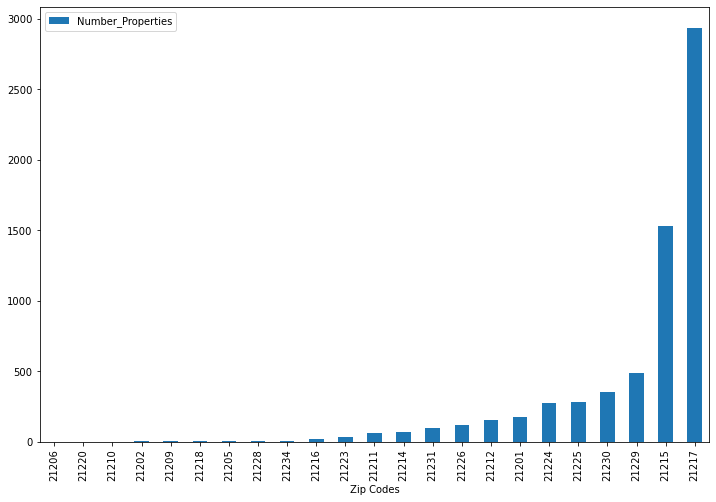

In [47]:
pd.options.plotting.backend = "matplotlib"

gb.sort_values(by="Number_Properties").plot.bar(
    x="Zip Codes", 
    y="Number_Properties",
    figsize=(12,8)
)

The above chart shows that 21217 is the zip code with the most vacant houses. This is not suprising. That zipcode is the neighborhood Sandtown-Winchester. That neighborhood is known for having high crime rates. The issue here is that vacant houses and crime create a negative feedback loop. Vacant houses attract drug users, drug users often resort to petty crime to pay for their habit, petty crime drives out renters and home owners and urban blight sets in. 
The takeaway here is that the concentration of vacant houses here is an oppourtunity for the government to concentrate their destruction effort in a small area. By focussing on this neiborhood they will be able to clear houses without having to move their labor force, or heavy equipment.

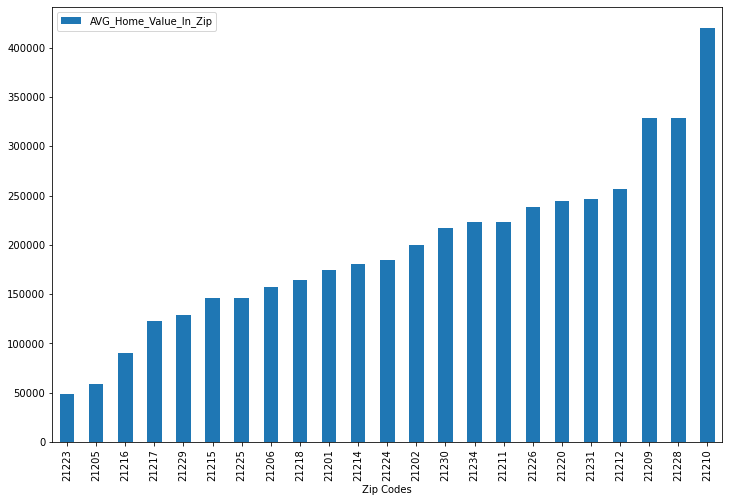

In [48]:
gb.sort_values(by="AVG_Home_Value_In_Zip").plot.bar(
    x="Zip Codes", 
    y="AVG_Home_Value_In_Zip",
    figsize=(12,8)
)

In [49]:
gb.loc[gb['Zip Codes'] == 21210]

,Zip Codes,Number_Properties,AVG_Home_Value_In_Zip
5,21210,2,420222.0


21210 is the zip with the highest property value. This neiborhood is Roland Park. The average home price is around $400,000. The vacant houses in this neiborhood represent an oppourtunity for contractors.

 For the next step lets track the home value of some of the high volume zip codes to see if there is a positive trend in any that can be explouted.
 
 To do this I will
 - Import the entire zip code data frame with home prices over time 
 - make a new dataframe from the entire set where the city is baltimore
 - Delete all values but the zip codes and home prices 
 - transpose the home prices and zip codes
 - then plot a line chart with the zip codes and the home value over time

In [52]:
# Reading in CSV
df4 = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

In [56]:
#Selecting just Baltimore Zips
df5=df4.loc[df4['City'] == "Baltimore"]

In [58]:
#Dropping columns to prepare to transpose
del df5['RegionID']
del df5['SizeRank']
del df5['RegionType']
del df5['StateName']
del df5['State']
del df5['City']
del df5['Metro']
del df5['CountyName']

In [65]:
#Setting the zipcode as the index in order to prep to transpose
df5=df5.set_index('RegionName')

In [66]:
#Transposing
df6=df5.T

In [72]:
#Prepping the data
df6

RegionName,21215,21224,21218,21206,21229,21230,21217,21239,21212,21201,...,21202,21223,21211,21231,21214,21210,21205,43105,21226,43157
1996-01-31,79236.0,91089.0,72364.0,81269.0,82089.0,89603.0,65704.0,96732.0,112656.0,90496.0,...,82182.0,28836.0,65191.0,76577.0,79625.0,177775.0,NaN,155189.0,102114.0,98987.0
1996-02-29,79016.0,90938.0,72764.0,81321.0,82218.0,89596.0,64931.0,96846.0,112768.0,88743.0,...,81381.0,28902.0,65192.0,76963.0,79509.0,177574.0,NaN,155194.0,102268.0,97473.0
1996-03-31,78796.0,90787.0,72995.0,81392.0,82265.0,89378.0,64601.0,96978.0,112923.0,87770.0,...,80218.0,28856.0,65116.0,76338.0,79387.0,177418.0,NaN,155165.0,102288.0,96468.0
1996-04-30,78370.0,90592.0,73298.0,81549.0,82369.0,89113.0,64546.0,97210.0,113227.0,85850.0,...,78455.0,28994.0,65024.0,75500.0,79244.0,177141.0,NaN,155529.0,102413.0,94517.0
1996-05-31,78146.0,90534.0,73350.0,81675.0,82585.0,88533.0,64843.0,97289.0,113407.0,84783.0,...,76770.0,29093.0,64936.0,74286.0,79184.0,177222.0,NaN,155987.0,102692.0,94250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,142616.0,180685.0,161144.0,153227.0,121685.0,211193.0,117959.0,151421.0,247438.0,174635.0,...,196738.0,47179.0,217460.0,242967.0,177415.0,410011.0,58166.0,254596.0,229488.0,123962.0
2020-06-30,142690.0,180867.0,161061.0,152982.0,122708.0,211696.0,118557.0,152019.0,248665.0,174379.0,...,196785.0,47345.0,217375.0,243122.0,176761.0,410281.0,58237.0,257186.0,230850.0,124761.0
2020-07-31,142816.0,181368.0,161377.0,153442.0,124030.0,213061.0,119537.0,153326.0,250540.0,174373.0,...,197280.0,47520.0,218363.0,243833.0,176658.0,411660.0,58225.0,259915.0,232736.0,127787.0
2020-08-31,143875.0,182487.0,162215.0,154821.0,125800.0,214827.0,120977.0,155072.0,253034.0,174537.0,...,198523.0,47822.0,220170.0,244998.0,177611.0,414839.0,58198.0,262929.0,235297.0,130403.0


In [68]:
import matplotlib.pyplot as plt

In [69]:
%matplotlib inline

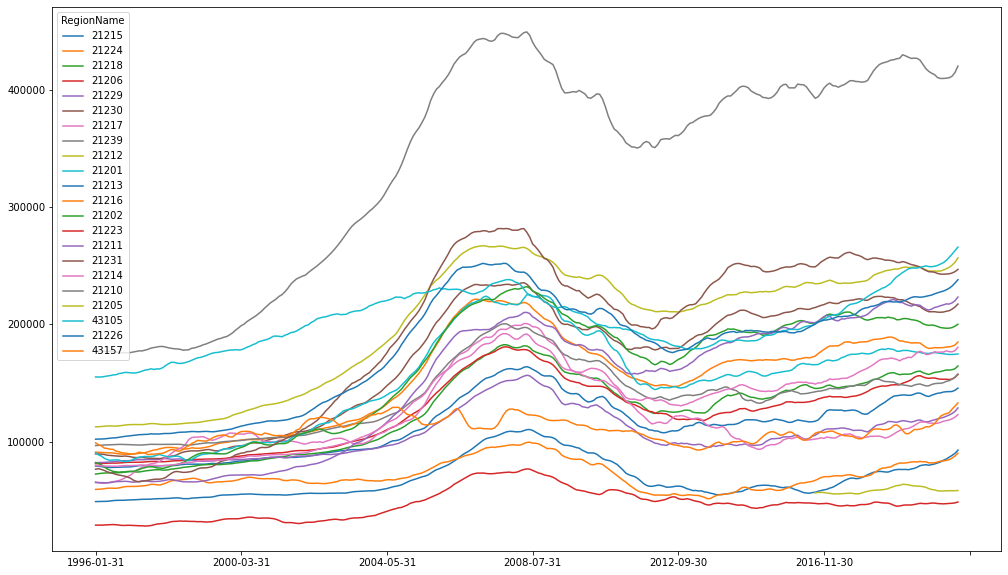

In [82]:
#Plotting the data
df6.plot(figsize=(17,10
                 ))


The above chart has all of the zipcodes ane because the colors repeat it is hard to tell which zip code is which. It is not helpful for determining trends in specific zipcodes but it does detail an overall trend. In 2008 home values were at their highest accross the city. There was a decrease in home value that continyed until 2012 since then homes in Baltimore have started to increase in value once again.

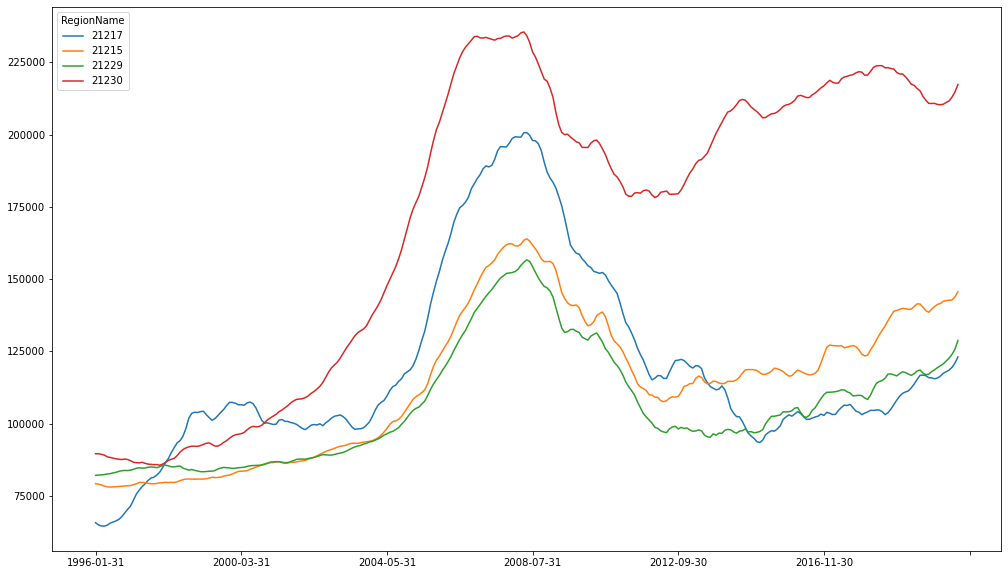

In [113]:
#Plotting high volume zipcodes
df6[[21217,21215,21229,21230,]].plot(figsize=(17,10
                 ))





In [114]:
#21230 was the highest preforming zipcode of the high volume vacant house zip codes. Lets see how many houses are there?
gb.loc[gb['Zip Codes'] == 21230]

,Zip Codes,Number_Properties,AVG_Home_Value_In_Zip
20,21230,353,217377.0


21230 is pigtown a neighborhood by the stadiums. It has mantianed a high home value and had a steep rise recently. This neighborhood is the best neighborhood for making investments. It has an inventory of 353 vacant properties which can be purchased with Baltimore city's  Vacants to value program. 